# Time Series Analysis - ARIMA, Autocorrelation - Lag variables extraction
## This lag vars will have to be extracted on the plain dataset, not in sumofstores which is only used to enhance the behavior and better find good lag vars representatives

In [10]:
# line plot of time series
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt
# load dataset
dataset = pd.read_csv('./dataset/preprocessed_train.csv')

In [21]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
sumofstores = dataset.groupby('Date').agg(aggregation_dict)
sumofstores = sumofstores.reset_index()
sumofstores['Date'] = pd.to_datetime(sumofstores['Date'], errors='coerce')  #important otherwise no ticks
sumofstores.head(10)

,Date,NumberOfSales,NumberOfCustomers,StoreID
0,2016-03-01,2859022,200201,746
1,2016-03-02,3391931,226783,746
2,2016-03-04,3463684,232784,746
3,2016-03-05,3194694,208141,746
4,2016-03-06,79491,7717,10
5,2016-03-07,5289204,302987,746
6,2016-03-08,4279299,261456,745
7,2016-03-09,3856111,242404,745
8,2016-03-10,3811159,242593,745
9,2016-03-11,3873215,246599,745


In [33]:
#Sampling
sample=sumofstores.iloc[:200]

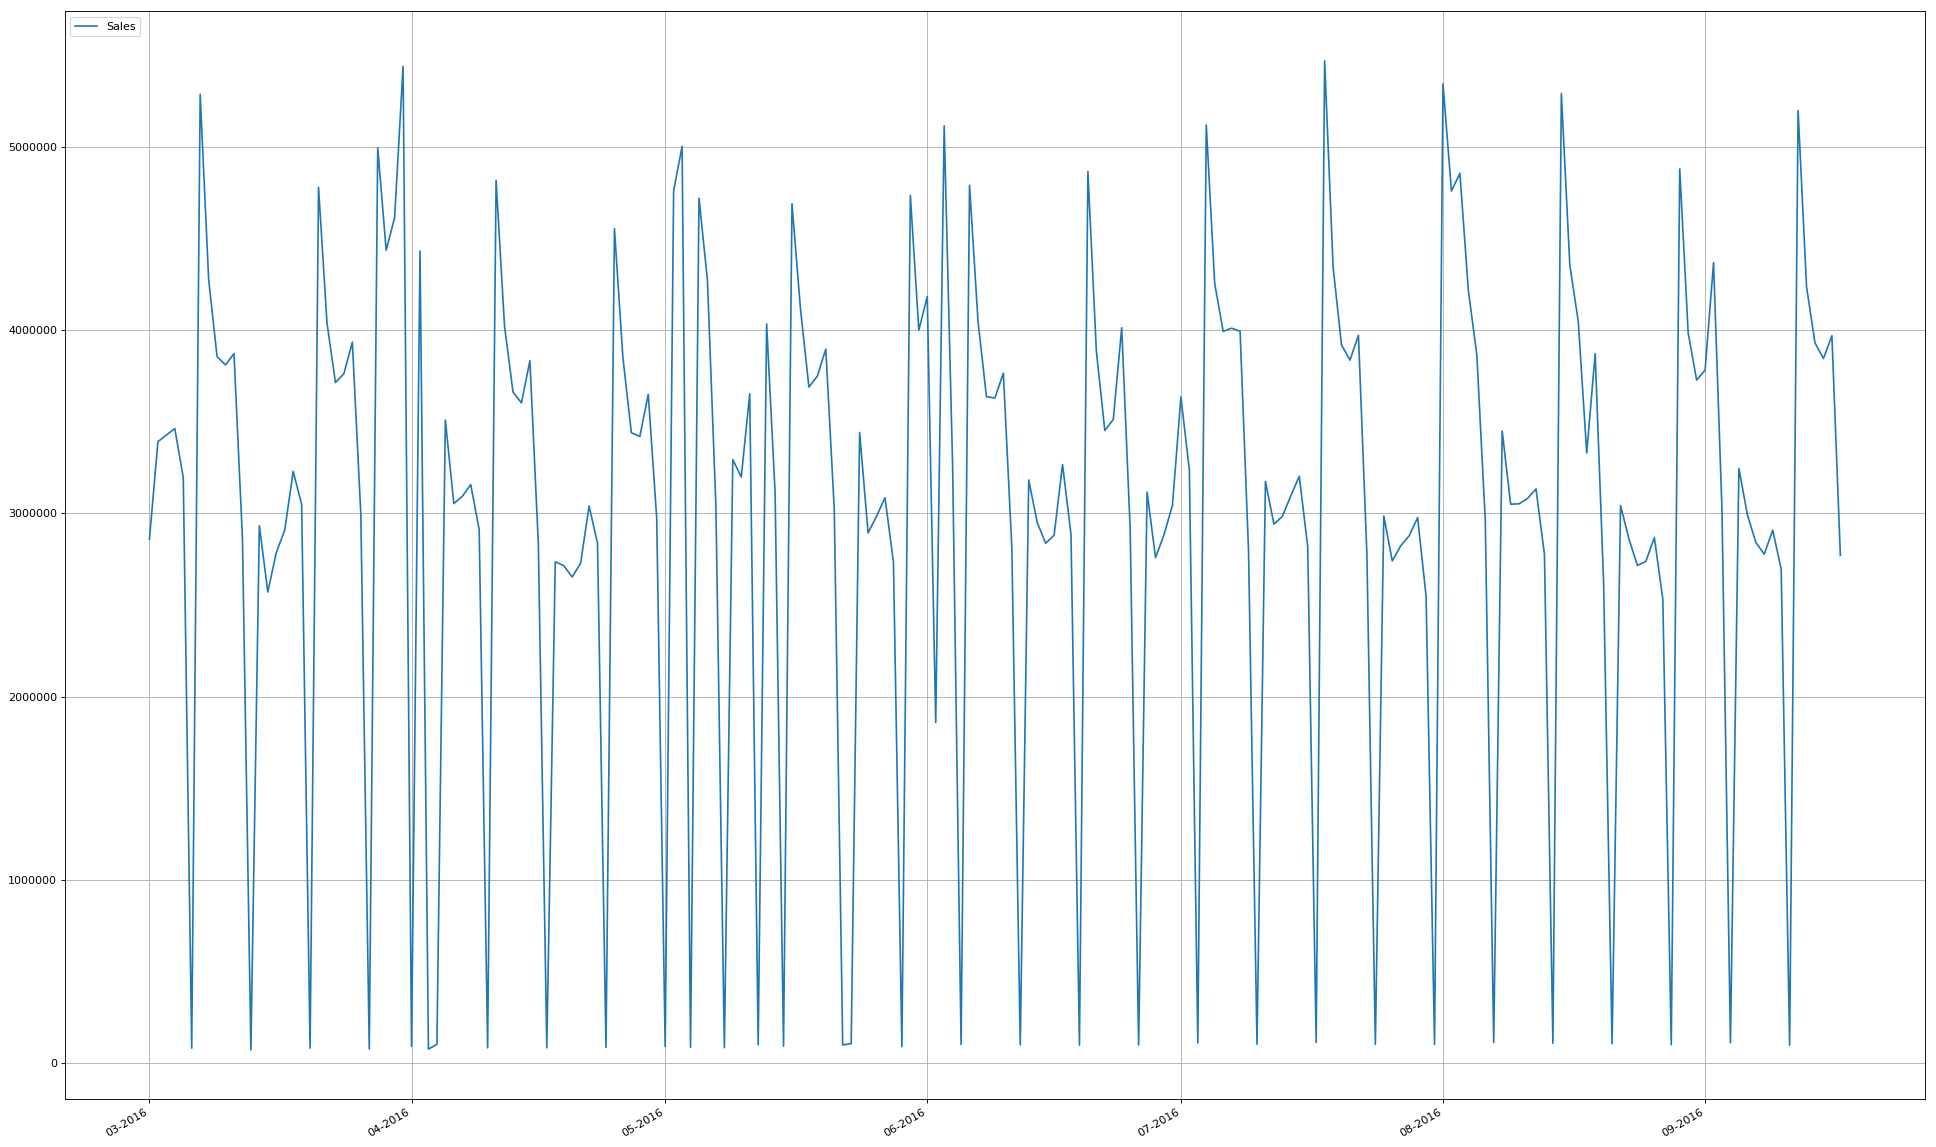

In [51]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

plt.rcParams['figure.figsize'] = [30.0,20.0]
plt.rcParams['figure.dpi']=80
fig, ax = plt.subplots()
    
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
    
ax.plot(sample.Date, sample.NumberOfSales)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
ax.grid(True)
plt.legend(['Sales'], loc='upper left')

fig.autofmt_xdate()
plt.show()

## Autocorrelation plot (Correlogram)
It shows the correlation of each lagged observation and whether or not the correlation is statistically significant.

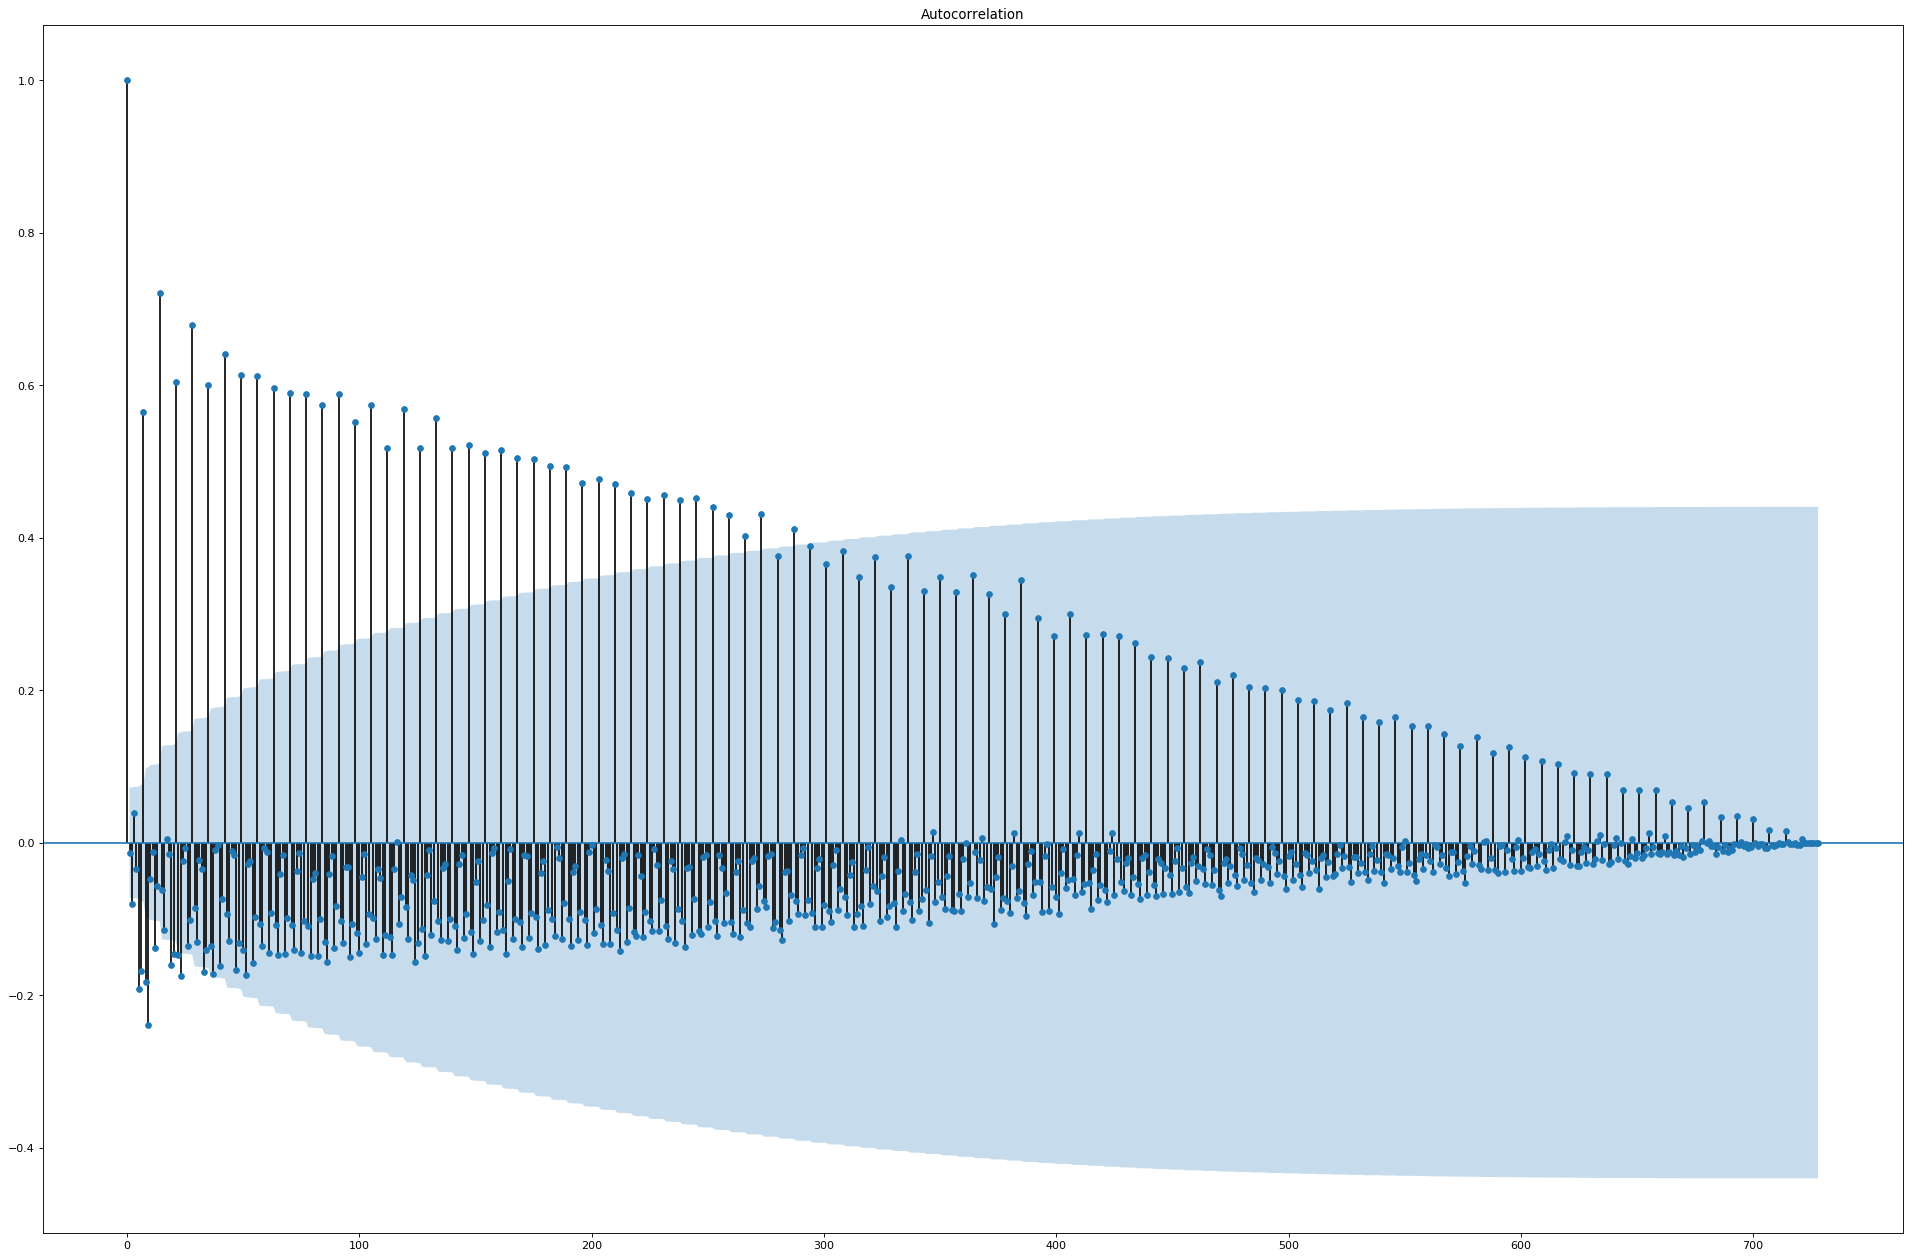

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sumofstores['NumberOfSales'])
plt.show()

Since the ACF pattern clearly show a linear autocorrelation decay, the analysis must be performed on a differentiation

## Removing seasonality and trend, stationary Time Series
The main seasonality is clearly on the week (monday-sunday), let's create a seasonality adjusted time series

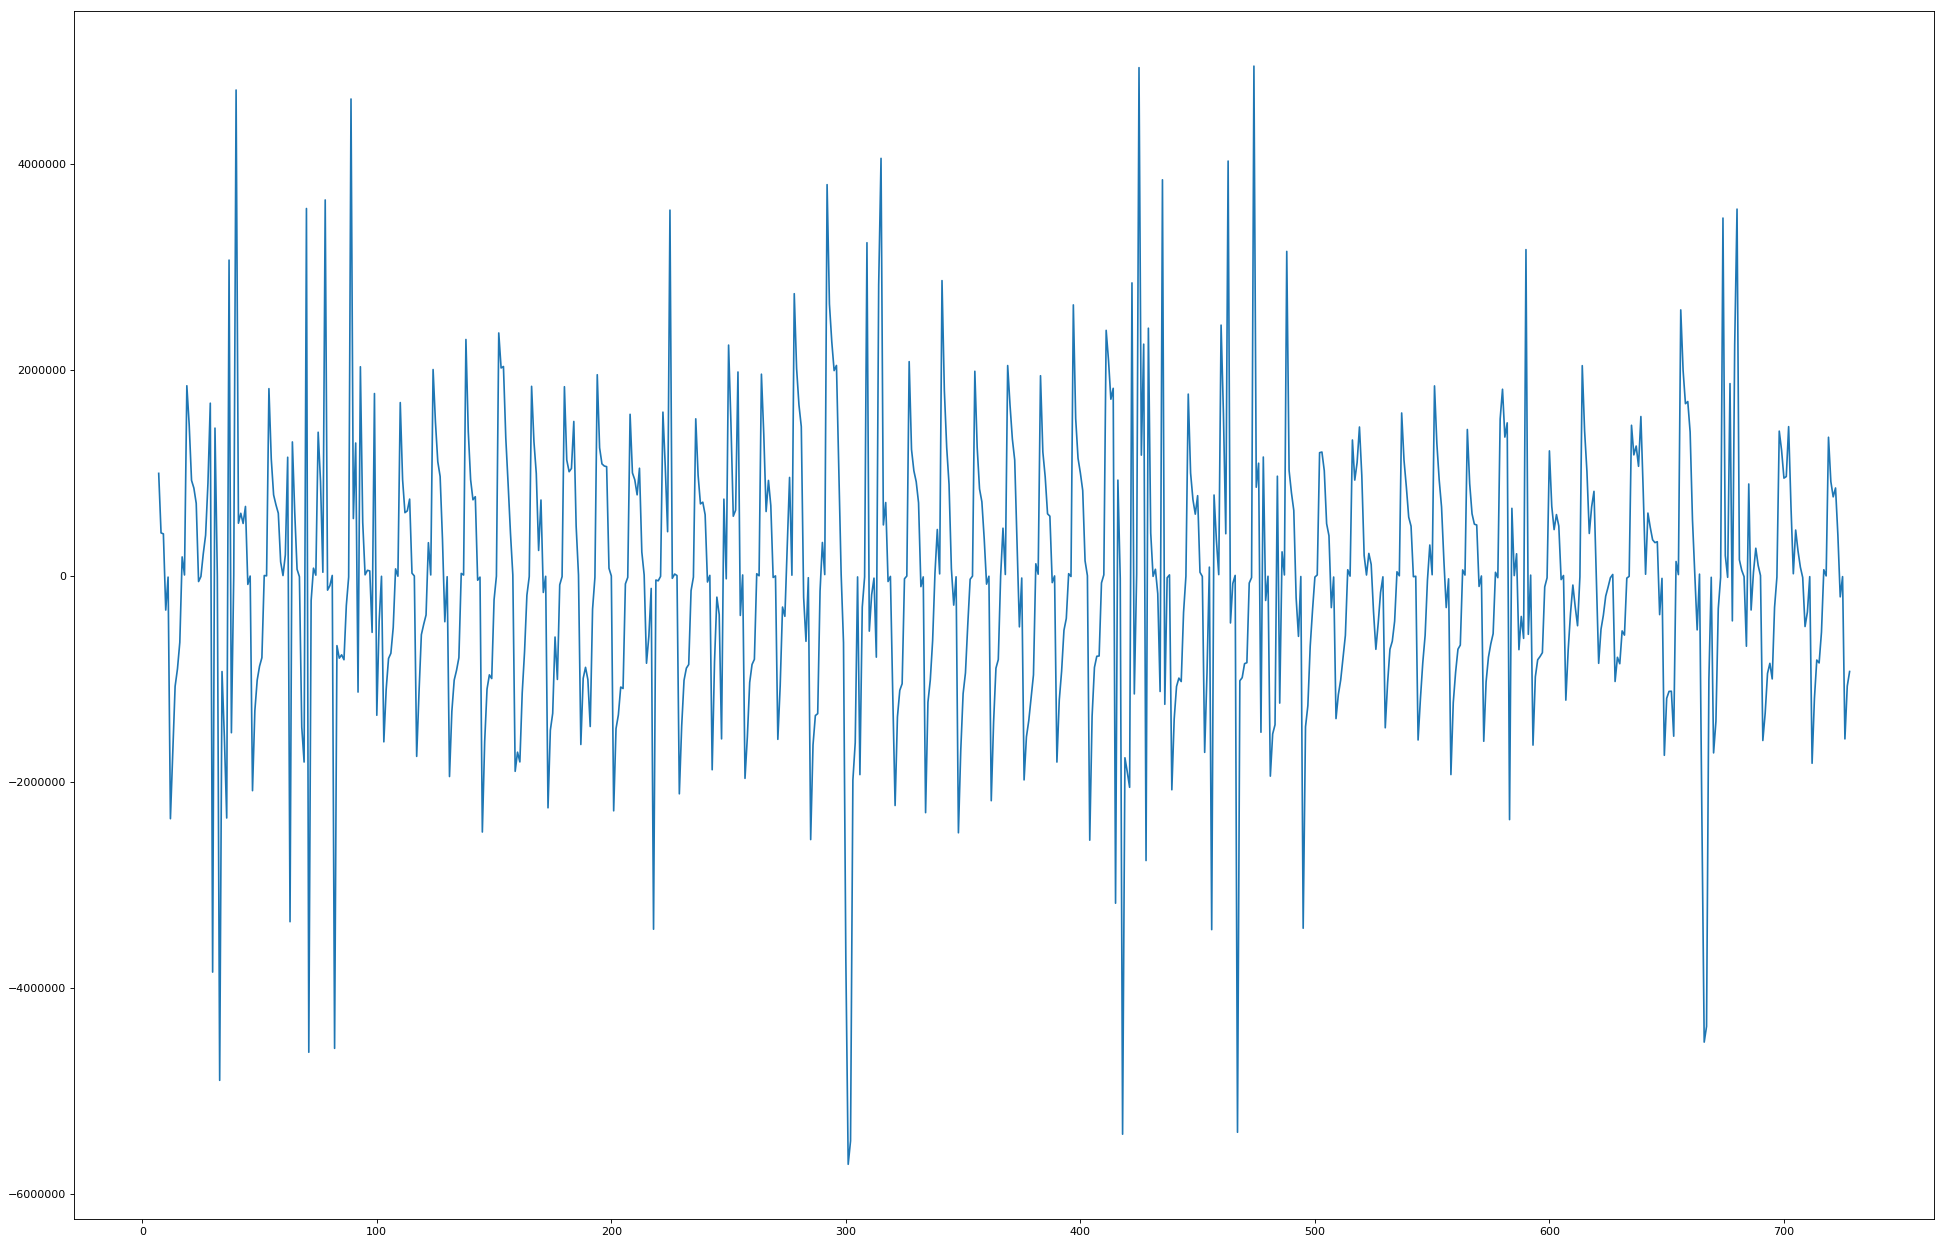

In [53]:
# seasonal difference
differenced = sumofstores.NumberOfSales.diff(7)
# trim off the first year of empty data
differenced = differenced[7:]
# save differenced dataset to file
#differenced.to_csv('seasonally_adjusted.csv')
# plot differenced dataset
differenced.plot()
pyplot.show()

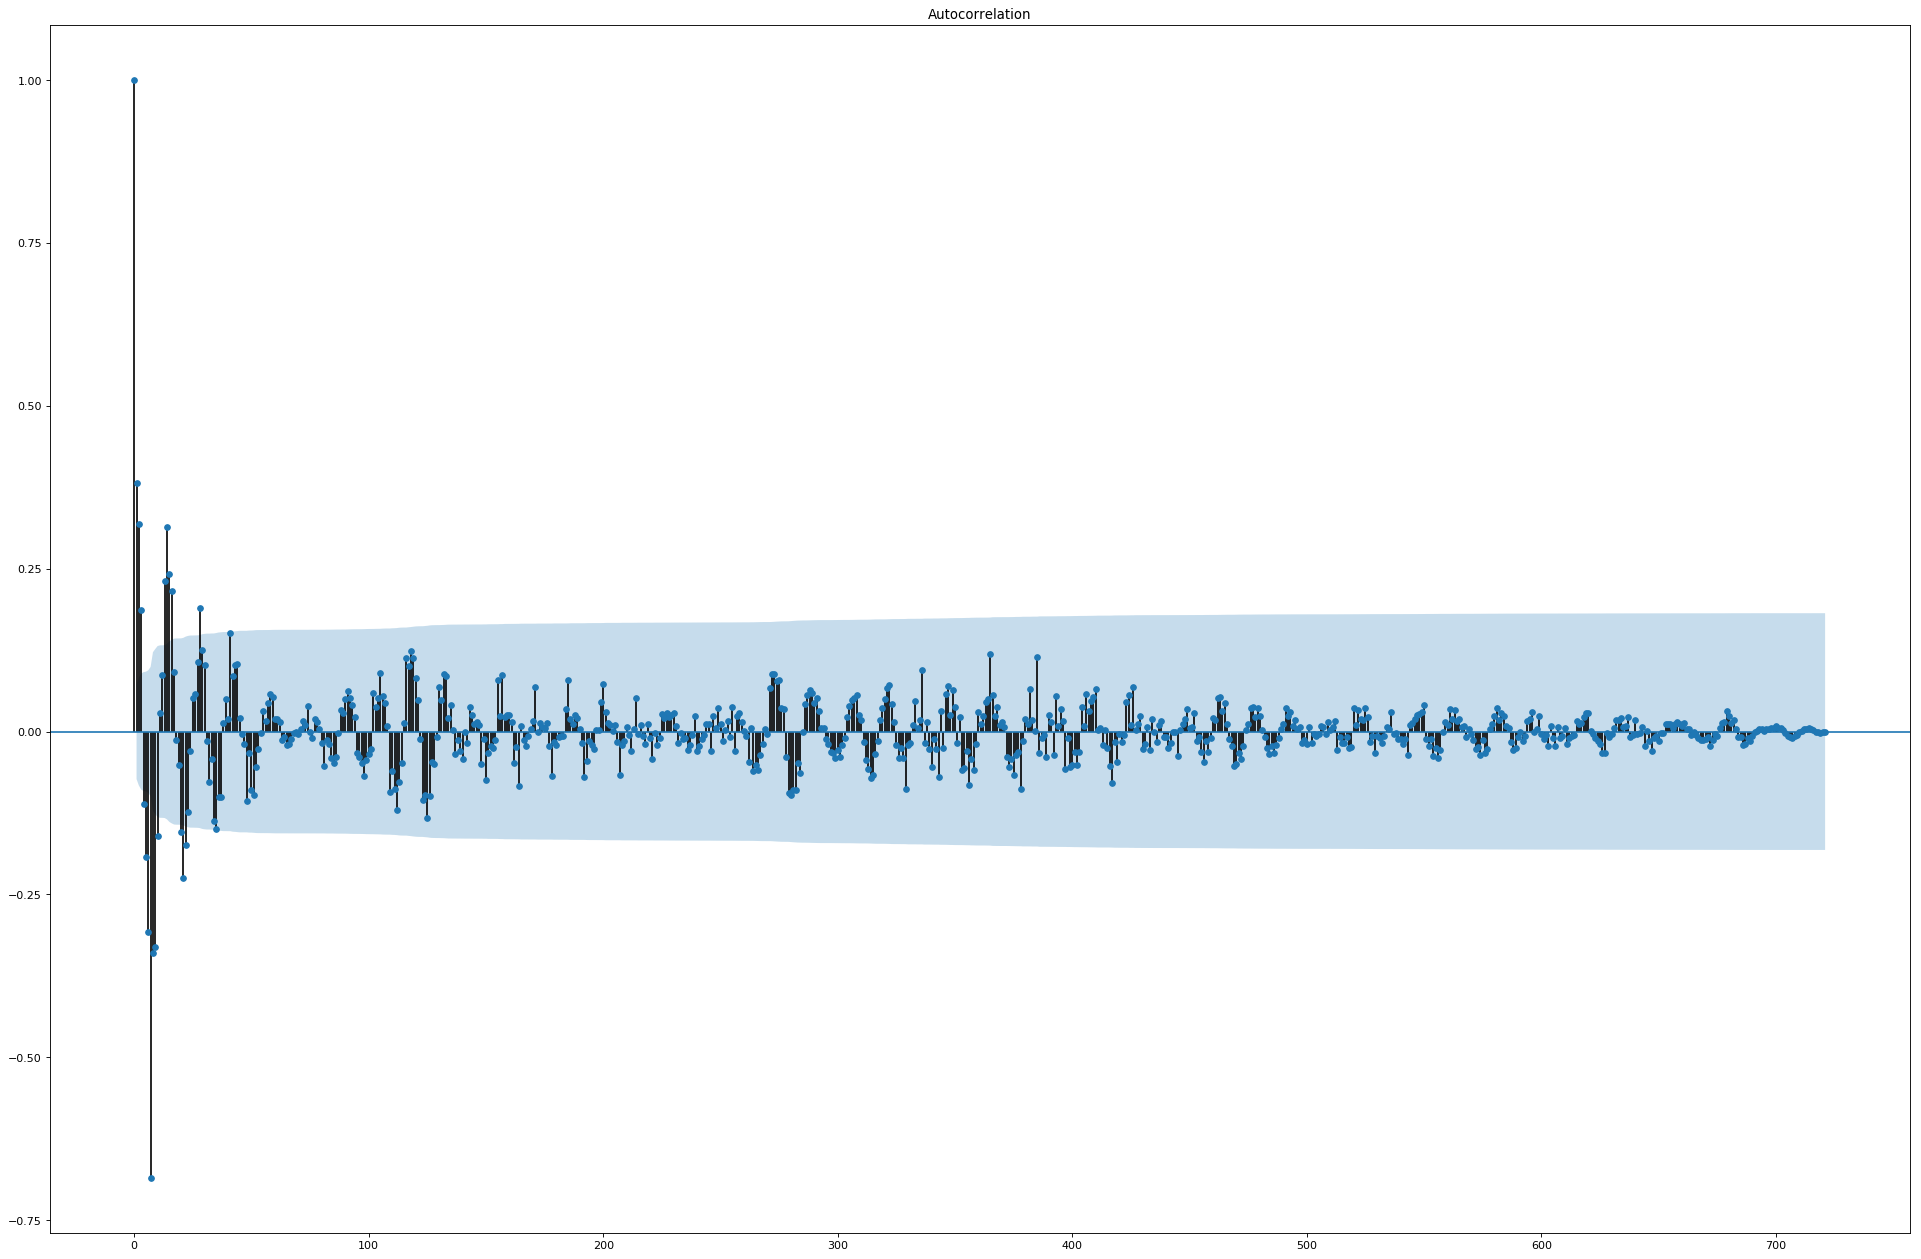

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
plt.show()

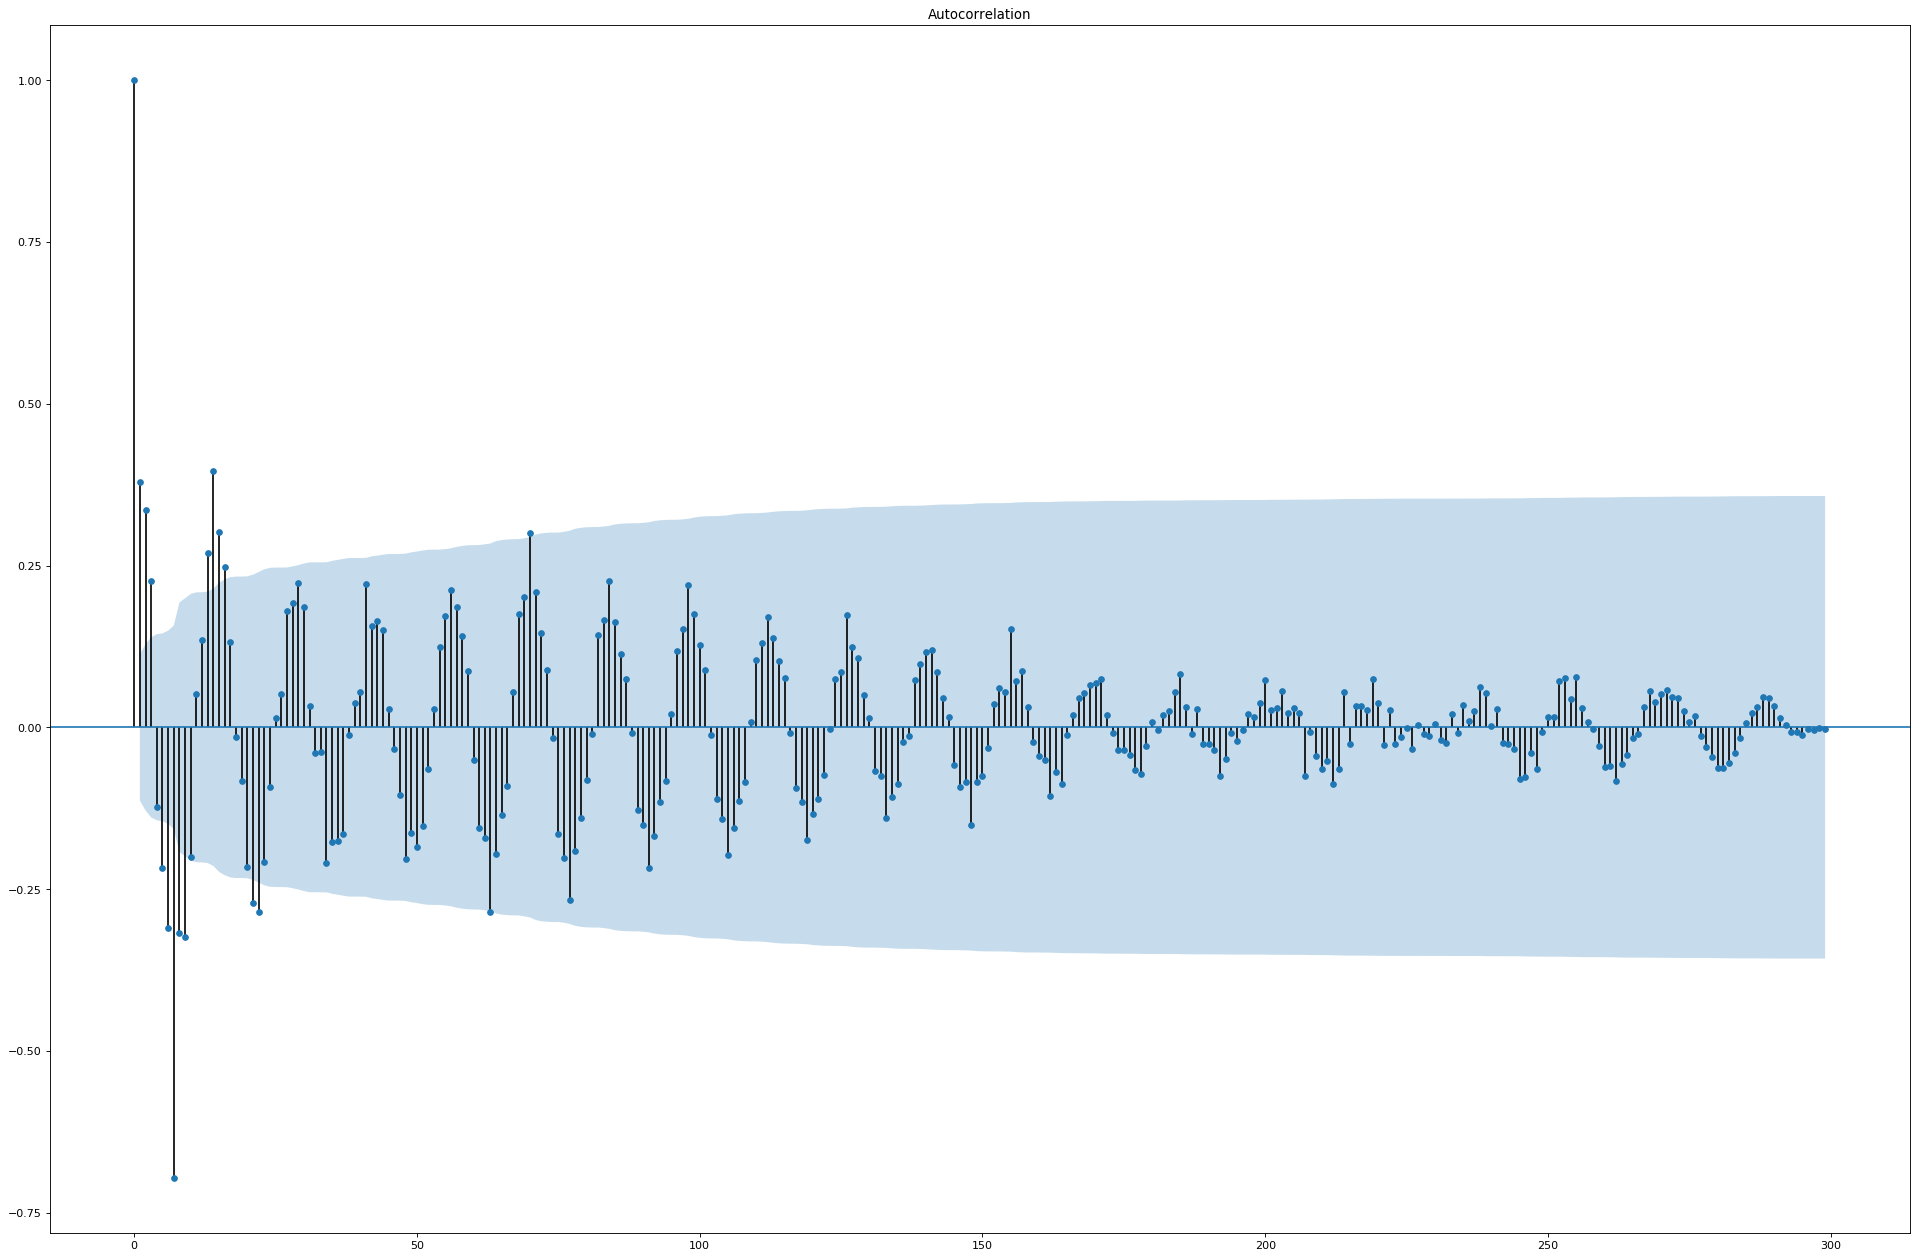

In [55]:
plot_acf(differenced[:300])
plt.show()

__The most important lags identified are 2,3,4,8,15, we have to keep in mind that 0-sales have to be reincluded in the training before computing the lags and inserting them__

## Partial autocorrelation

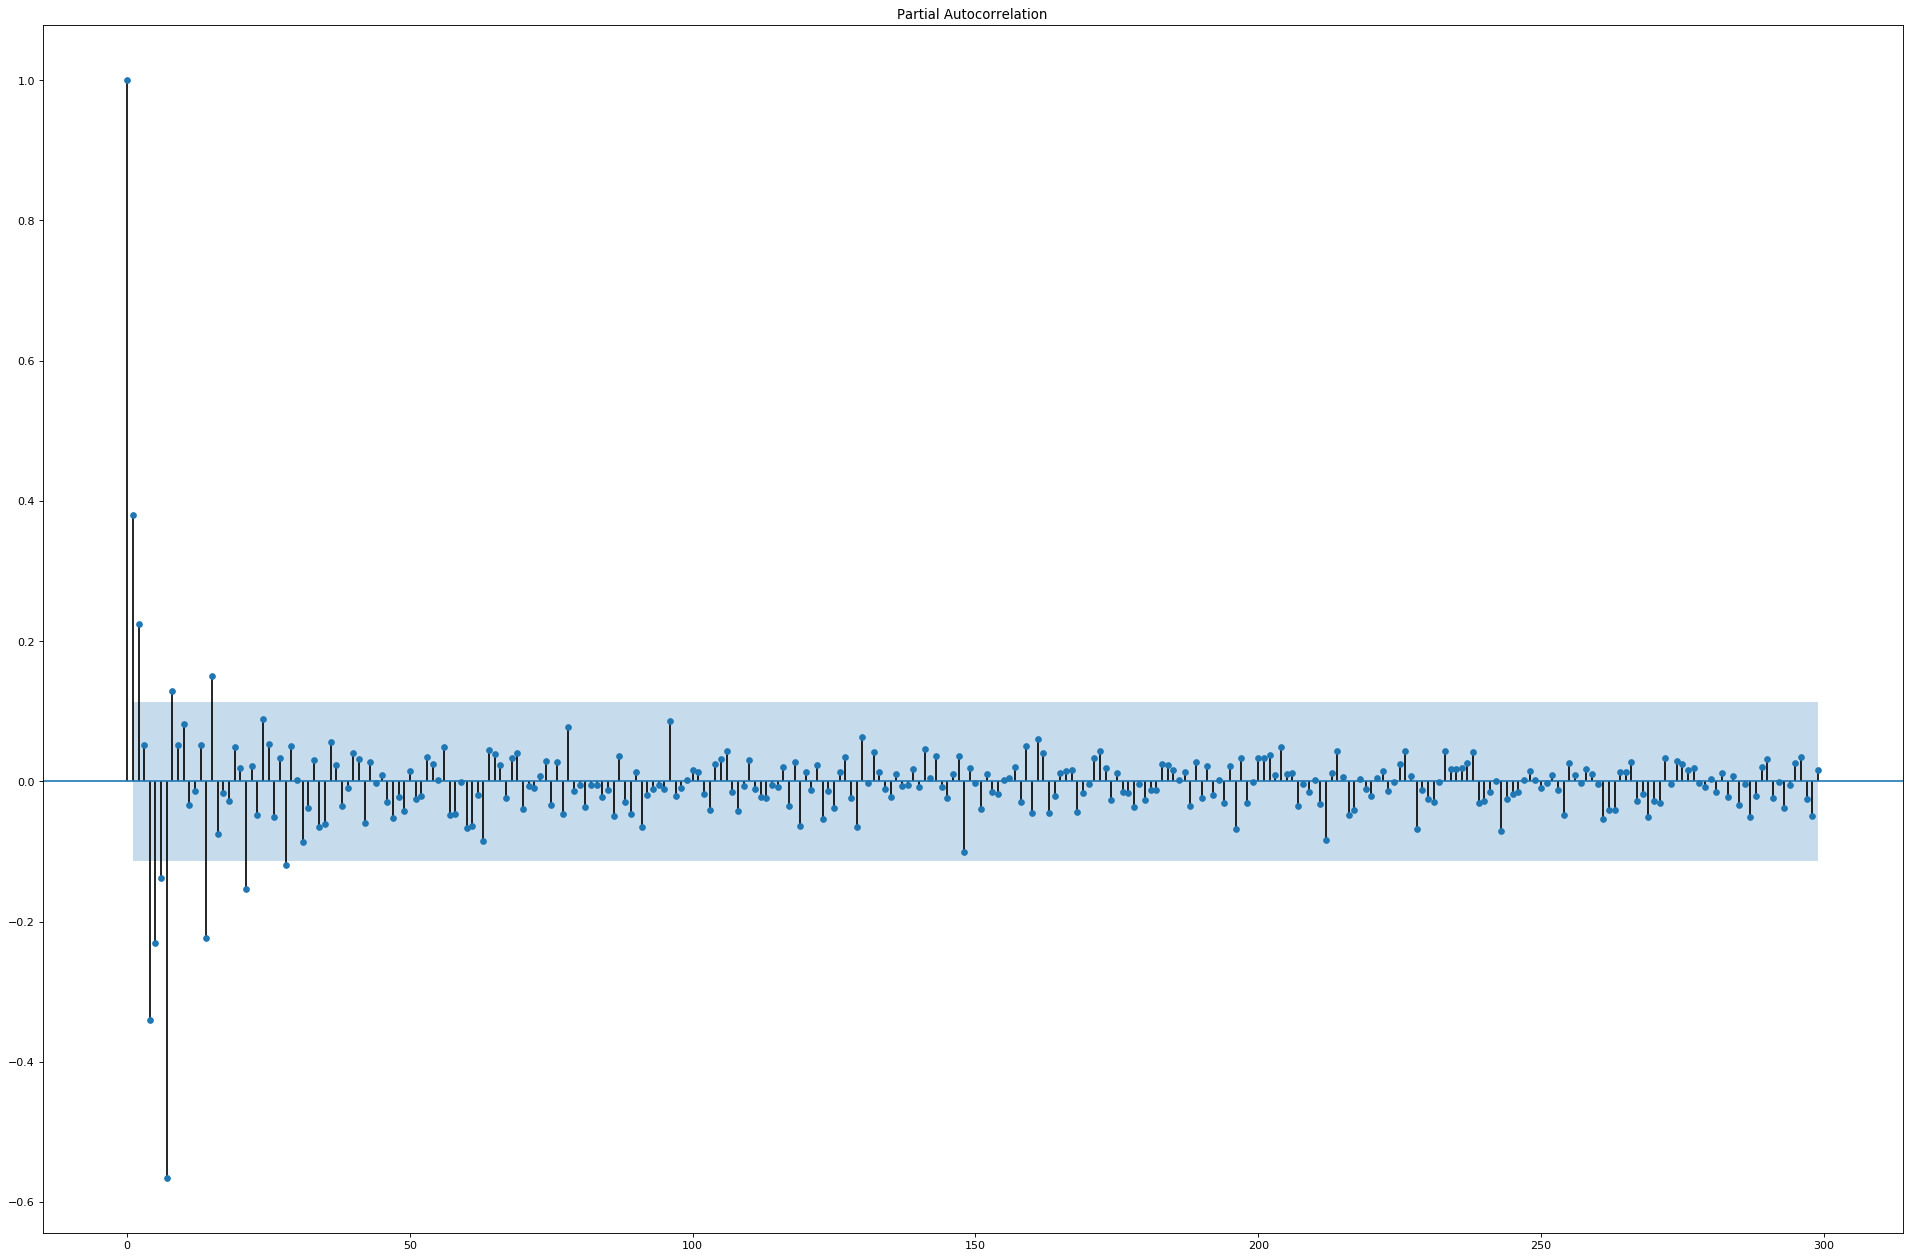

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced[:300])
plt.show()